### Importação das bibliotecas
Importação de bibliotecas necessárias para manipulação de dados (`pandas`, `numpy`), cálculos estatísticos, e visualizações (`matplotlib`, `seaborn`).
Começando com a importação das bibliotecas recomendadas na específicação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carregamento dos dados
Os dados são carregados diretamente do GitHub. O dataset contém informações médicas de pacientes Pima Indians, com a variável alvo "Outcome", que indica a presença ou ausência de diabetes.


In [2]:
# Puxar o conjunto de dados diretamente do GitHub
url = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1518/main/datasets/diabetes.csv'
pima_df = pd.read_csv(url)

# Exibir as primeiras 5 linhas do conjunto de dados para verificar o carregamento
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploração inicial dos dados
Verificação da estrutura dos dados, incluindo tipos de variáveis e a presença de valores nulos. Ajudando a entender a composição do dataset e identificar problemas de qualidade de dados.

### Estatísticas descritivas
Obtenção de descritivas das variáveis numéricas, como média, mediana, valores mínimos e máximos, o que ajuda a entender melhor a distribuição dos dados.



In [3]:
# Verificar a estrutura dos dados
pima_df.info()
# Obter estatísticas descritivas das variáveis numéricas
pima_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Histogramas das variáveis numéricas
Criação de histogramas para visualizar a distribuição dos dados em intervalos. Isso permite a identificação da forma de distribuição numerica (simétrica, enviesada, etc.)


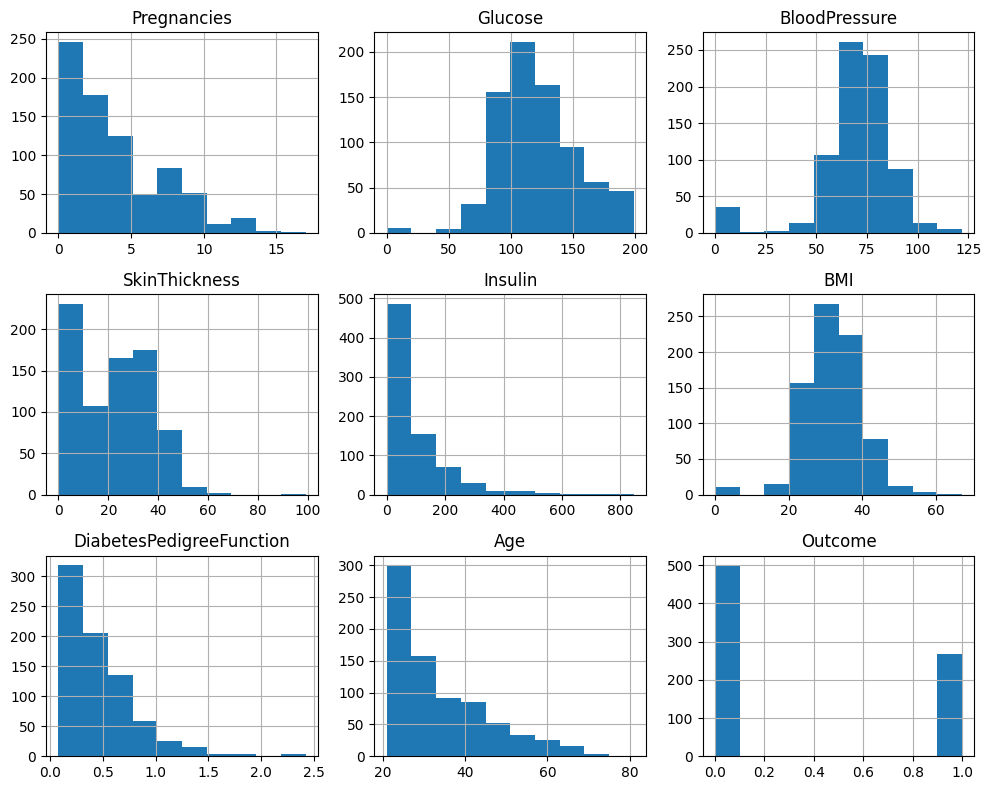

In [4]:
# Histogramas das variáveis numéricas
pima_df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

### Boxplots para análise de outliers
Utilização de boxplots para identificar possíveis outliers nas variáveis, como `Insulin` e `SkinThickness`. Outliers são valores que estão muito fora do padrão esperado.


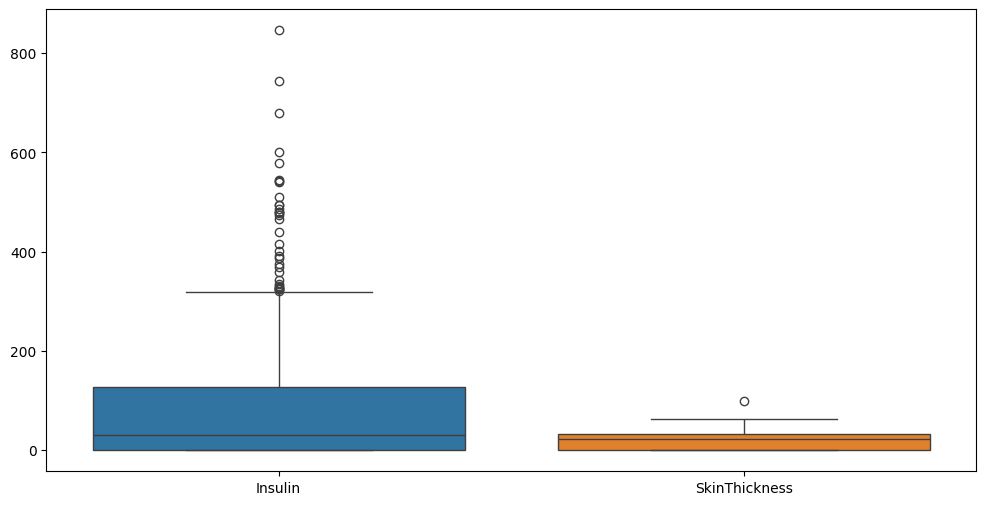

In [5]:
# Boxplots para análise de outliers (exemplo: Insulin, SkinThickness)
plt.figure(figsize=(12, 6))
sns.boxplot(data=pima_df[['Insulin', 'SkinThickness']])
plt.show()

### Matriz de correlação e heatmap
Calculo da matriz de correlação para identificar a força das relações entre as variáveis numéricas. Utilizando um heatmap para a visualização, que facilita a interpretação dos coeficientes de correlação.


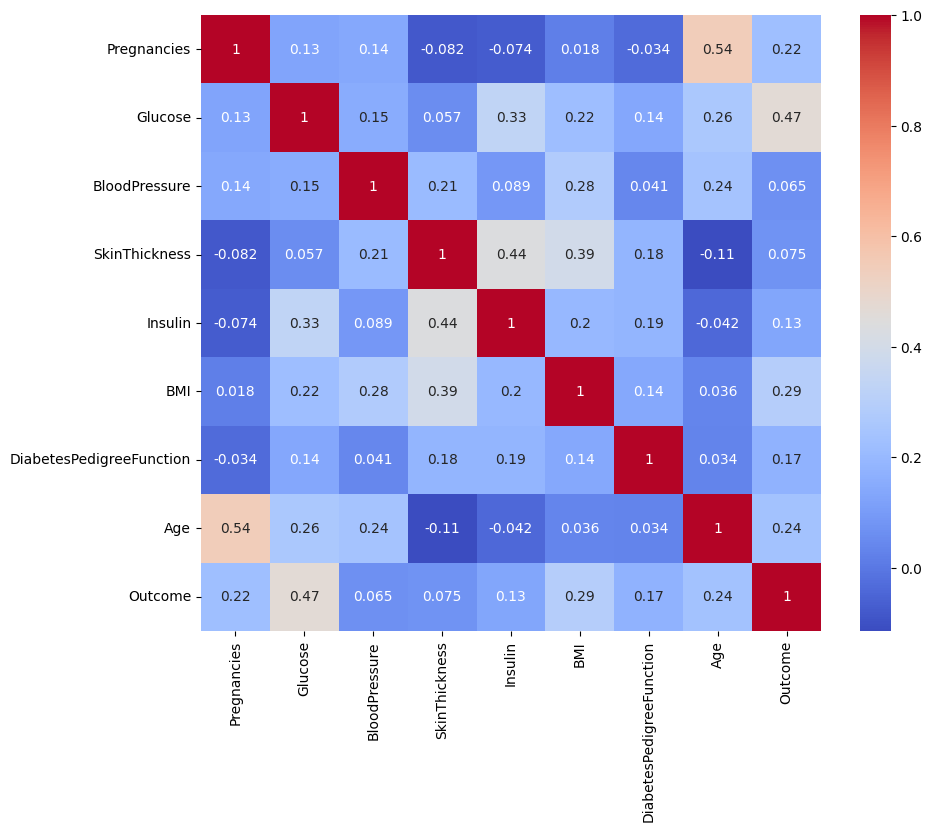

In [6]:
# Calcular a matriz de correlação e visualizá-la com um heatmap
corr_matrix = pima_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Gráficos de dispersão entre pares de variáveis
Criação de gráficos de dispersão para investigar relações entre variáveis numéricas, como `Age`, `BMI`, `Glucose` e `Insulin`. Para colaborar na identificação de tendências ou correlações visuais.


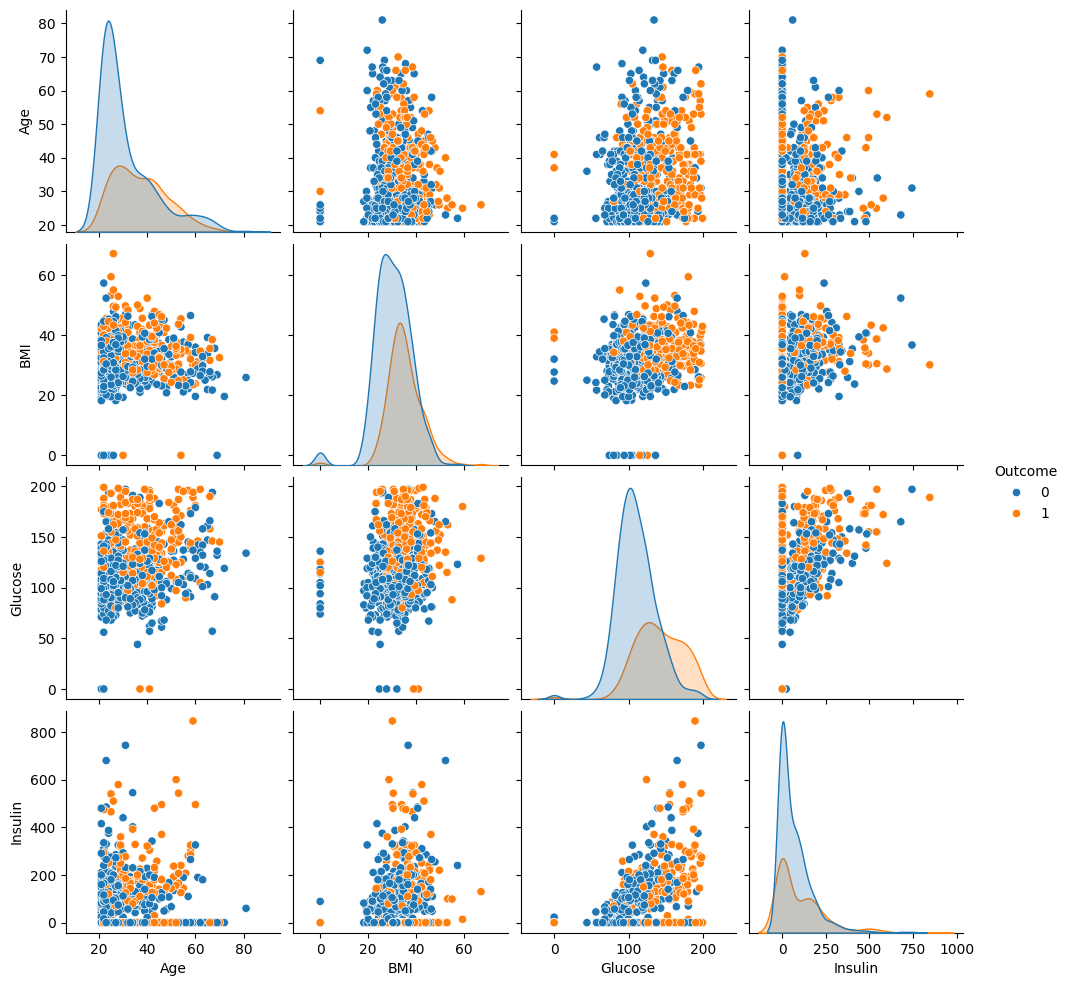

In [7]:
# Gráficos de dispersão entre pares de variáveis
sns.pairplot(pima_df, vars=['Age', 'BMI', 'Glucose', 'Insulin'], hue='Outcome')
plt.show()

### Boxplot de Glucose para cada categoria da variável Outcome
Criação de um boxplot para comparar a variável `Glucose` entre os grupos de `Outcome` (0 ou 1), para entender como a glicose varia entre pacientes com e sem diabetes.


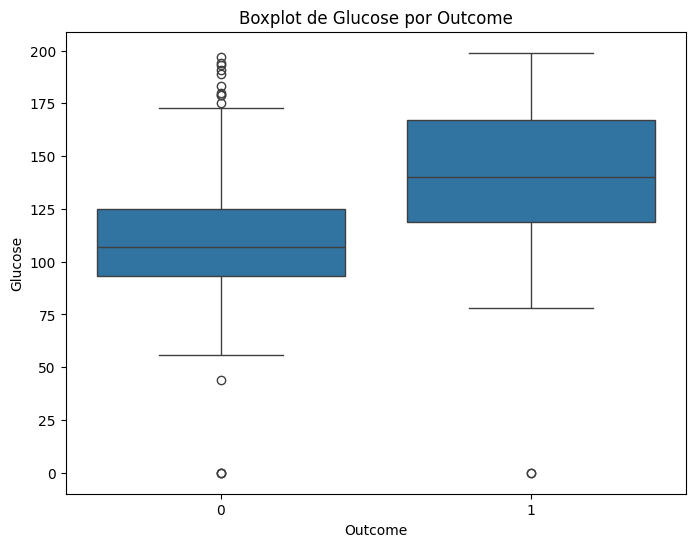

In [8]:
# Boxplot de Glucose para cada categoria da variável Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=pima_df)
plt.title('Boxplot de Glucose por Outcome')
plt.show()

### Distribuição da variável Outcome
Exibição da distribuição da variável categórica `Outcome` (0 ou 1) para verificar a quantidade de pacientes com e sem diabetes no dataset.


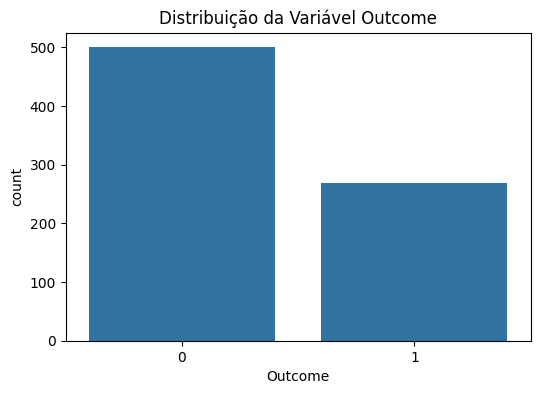

In [9]:
# Distribuição da variável Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=pima_df)
plt.title('Distribuição da Variável Outcome')
plt.show()

### Comparação de BMI e Glucose entre grupos de Outcome
Criação de boxplots para comparar as variáveis `BMI` e `Glucose` entre os grupos de `Outcome` (pacientes com e sem diabetes).


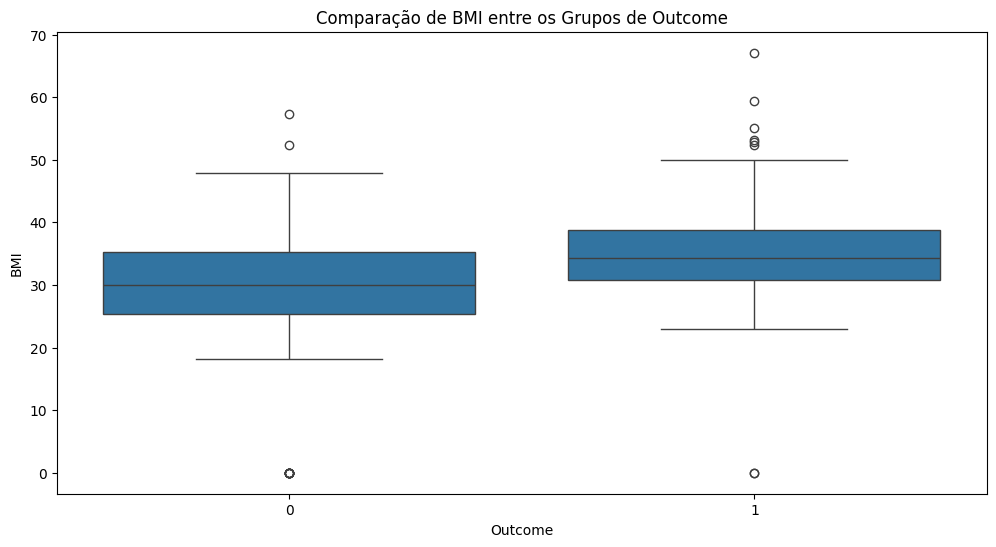

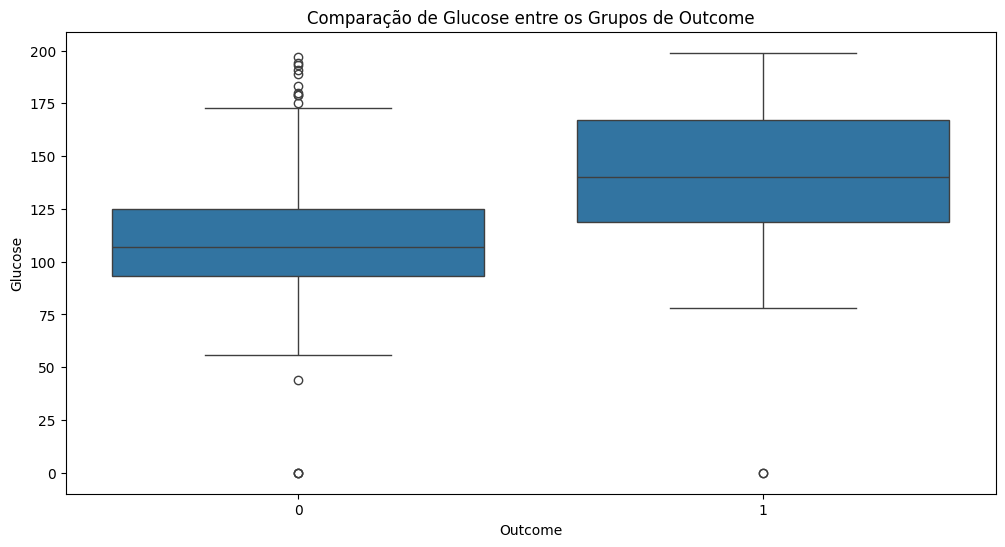

In [10]:
# Comparação de variáveis numéricas (exemplo: BMI, Glucose) entre grupos de Outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outcome', y='BMI', data=pima_df)
plt.title('Comparação de BMI entre os Grupos de Outcome')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Outcome', y='Glucose', data=pima_df)
plt.title('Comparação de Glucose entre os Grupos de Outcome')
plt.show()

### Definir faixas de glicose e criar coluna categórica
Definição de faixas de glicose e criação uma nova coluna categórica `glu_cat` com as seguintes faixas: (0-99], (99-120], e >120 mg/dl.


In [11]:
# Definir faixas de glicose
bins = [0, 99, 120, float('inf')]
labels = ['(0,99]', '(99-120]', '>120']

# Criar a coluna categórica glu_cat
pima_df['glu_cat'] = pd.cut(pima_df['Glucose'], bins=bins, labels=labels, right=True)

### Gráfico de barras condicional por faixas de glicose
Geração de um gráfico de barras condicional mostrando as porcentagens de `Outcome` para cada faixa da variável `glu_cat`, para entender como a glicose está distribuída entre os pacientes com e sem diabetes.


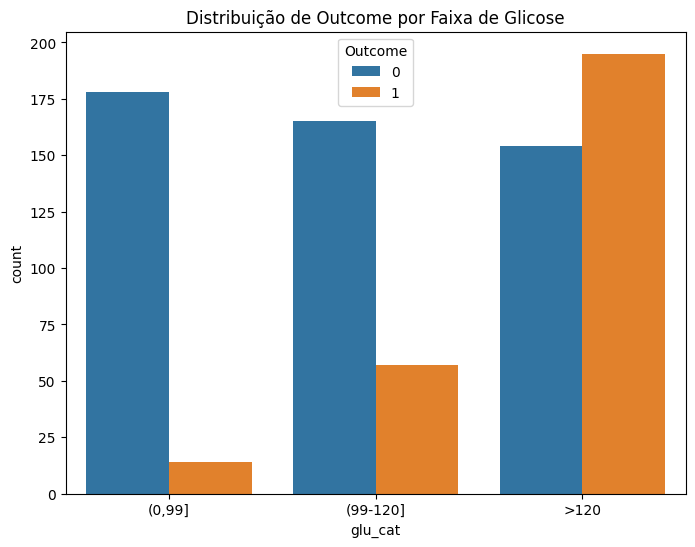

In [12]:
# Gerar gráfico de barras condicional mostrando as porcentagens de Outcome por faixa de glicose
plt.figure(figsize=(8, 6))
sns.countplot(x='glu_cat', hue='Outcome', data=pima_df)
plt.title('Distribuição de Outcome por Faixa de Glicose')
plt.show()

##Interpretação
Com esse gráfico é possível perceber claramente a correlação entre glicose elevada e a presença de diabetes, com o crescimento da faixa de glicose também há o crescimento de individuos com a doença

##PARTE 2


##Importação de bibliotecas
Importação das bibliotecas necessárias para a parte 2


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


##Carregamento e preparação dos dados
Carregamento do dataset da URL fornecida e definimos os nomes das colunas, já que o dataset não possui um cabeçalho. Após isso realiza a subtituição dos valores faltantes representados por "?" e a remoção de linhas que ainda contêm valores faltantes

In [14]:
# URL do dataset
url_adult = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Definir os nomes das colunas
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
    'hours_per_week', 'native_country', 'income'
]

# Carregar o dataset
adult_df = pd.read_csv(url_adult, names=columns, sep=',\s', engine='python')

# Substituir os valores " ?" por NaN para tratar como valores faltantes
adult_df.replace(' ?', pd.NA, inplace=True)

# Remover as linhas com valores faltantes
adult_df.dropna(inplace=True)


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gabri\AppData\Local\Temp\ipykernel_26832\240390080.py:12: SyntaxWarning: invalid escape sequence '\s'
  adult_df = pd.read_csv(url_adult, names=columns, sep=',\s', engine='python')


### Selecionar Colunas Categóricas

Selecionar as colunas categóricas do dataset que serão usadas para calcular a matriz de Cramér's V. Essas colunas são aquelas que contêm dados categóricos, como por exemplo a coluna 'workclass'.


In [15]:
# Selecionar apenas as colunas categóricas para a análise
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
categorical_df = adult_df[categorical_columns]


### Definir Função para Cálculo de Cramér's V

Definição da função cramers_v para calcular o coeficiente de Cramér's V a partir de uma matriz de contingência. Esse coeficiente mede a força da associação entre duas variáveis categóricas. Para calcular o valor, é usado o resultado do teste de qui-quadrado, que avalia a independência entre as variáveis. Em seguida, esse valor é ajustado levando em conta o número total de observações e as dimensões da matriz de contingência (o número de linhas e colunas).

In [16]:
def cramers_v(confusion_matrix):
    """Calcula o coeficiente de Cramér's V para uma matriz de contingência."""
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # Total de observações
    r, k = confusion_matrix.shape  # Número de linhas e colunas
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))


### Calcular e Exibir a Matriz de Cramér's V

Neste passo, é calculado o coeficiente de Cramér's V para cada par de variáveis categóricas. Depois é realizada a criação de uma matriz onde cada elemento representa a força da associação entre as variáveis correspondentes. O valor da diagonal é definido como `NaN` porque não faz sentido calcular a associação de uma variável com ela mesma.


In [17]:
# Criar o DataFrame para armazenar Cramér's V
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))), 
                                index=categorical_columns, columns=categorical_columns)

# Calcular Cramér's V para cada par de variáveis categóricas
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Gerar a matriz de confusão
            confusion_matrix = pd.crosstab(categorical_df[col1], categorical_df[col2])
            # Calcular o valor de Cramér's V
            cramers_v_value = cramers_v(confusion_matrix)
            # Armazenar o valor na matriz
            idx1 = categorical_columns.index(col1)
            idx2 = categorical_columns.index(col2)
            cramers_v_matrix.iloc[idx1, idx2] = cramers_v_value
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan  # Ignorar a diagonal

# Exibir a matriz resultante
print(cramers_v_matrix)


                workclass  education  marital_status  occupation  \
workclass             NaN   0.099369        0.085061    0.399993   
education        0.099369        NaN        0.091569    0.187334   
marital_status   0.085061   0.091569             NaN    0.133213   
occupation       0.399993   0.187334        0.133213         NaN   
relationship     0.098712   0.122654        0.487963    0.178626   
race             0.056280   0.074900        0.084219    0.080826   
sex              0.153670   0.095621        0.461827    0.424364   
native_country   0.045810   0.132637        0.073070    0.073121   
income           0.179208   0.368838        0.447404    0.351892   

                relationship      race       sex  native_country    income  
workclass           0.098712  0.056280  0.153670        0.045810  0.179208  
education           0.122654  0.074900  0.095621        0.132637  0.368838  
marital_status      0.487963  0.084219  0.461827        0.073070  0.447404  
occupation 

### Visualizar a Matriz de Cramér's V
É criada uma visualização da matriz de Cramér's V usando um heatmap. Isso ajuda a entender visualmente a força das associações entre as variáveis categóricas.


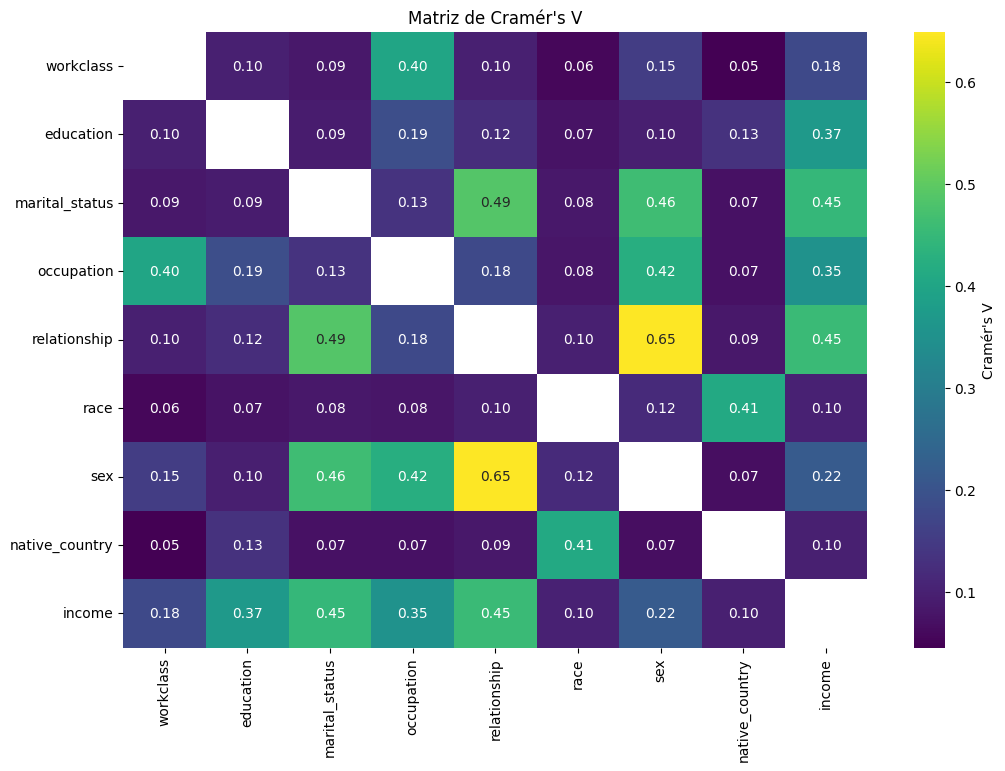

In [18]:
# Plotar a matriz Cramér's V
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='viridis', fmt='.2f', cbar_kws={'label': 'Cramér\'s V'})
plt.title('Matriz de Cramér\'s V')
plt.show()


##Classificação dos valores
Com base no intervalo fornecido é calculado a intensidade da associação entre as variáveis

In [19]:

# Passos para interpretar as associações
def interpret_cramers_v(cramers_v_value):
    if cramers_v_value < 0.2:
        return 'Fraca'
    elif 0.2 <= cramers_v_value < 0.4:
        return 'Moderada'
    else:
        return 'Forte'

##Preparação para interpretação
Renomeação de coluna para melhor clareza, e remoção de valores Nan para uma melhor visualização.

In [20]:
# Preparar a matriz para interpretação
cramers_v_matrix_reset = cramers_v_matrix.reset_index()
cramers_v_long = cramers_v_matrix_reset.melt(id_vars='index', var_name='Variable2', value_name='CramersV')
cramers_v_long.rename(columns={'index': 'Variable1'}, inplace=True)
cramers_v_long.dropna(subset=['CramersV'], inplace=True)

# Aplicar a função de interpretação
cramers_v_long['Interpretation'] = cramers_v_long['CramersV'].apply(interpret_cramers_v)

##Visualizar o gráfico de Associações
Por fim é criado um gráfico de barras para visualmente mostrar a distribuição das classificações.

         Variable1       Variable2  CramersV Interpretation
58    relationship             sex  0.649000          Forte
42             sex    relationship  0.649000          Forte
22    relationship  marital_status  0.487963          Forte
38  marital_status    relationship  0.487963          Forte
56  marital_status             sex  0.461827          Forte
..             ...             ...       ...            ...
61  native_country             sex  0.067148          Fraca
45       workclass            race  0.056280          Fraca
5             race       workclass  0.056280          Fraca
63       workclass  native_country  0.045810          Fraca
7   native_country       workclass  0.045810          Fraca

[72 rows x 4 columns]
Interpretation
Fraca       50
Forte       14
Moderada     8
Name: count, dtype: int64


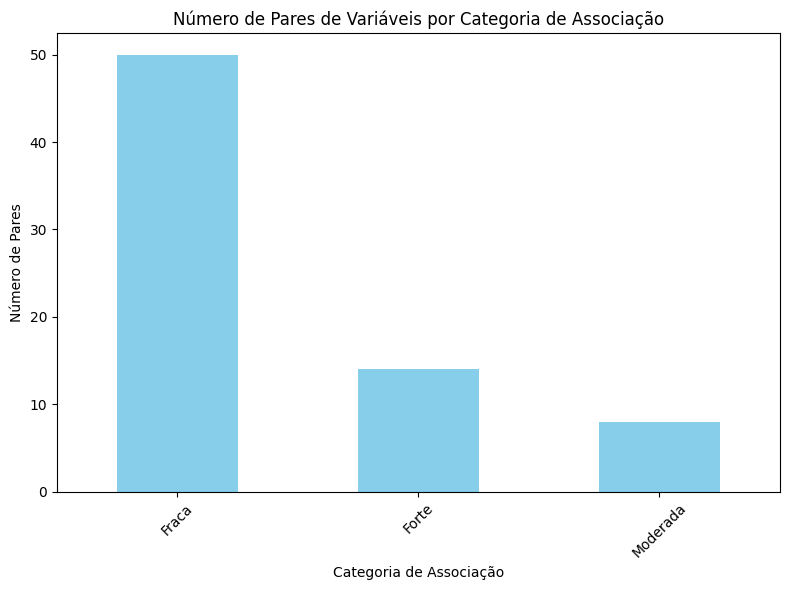

In [21]:
# Ordenar e exibir os resultados
cramers_v_long_sorted = cramers_v_long.sort_values(by='CramersV', ascending=False)
print(cramers_v_long_sorted[['Variable1', 'Variable2', 'CramersV', 'Interpretation']])

# Análise estatística
interpretation_counts = cramers_v_long['Interpretation'].value_counts()
print(interpretation_counts)

# Visualização
plt.figure(figsize=(8, 6))
interpretation_counts.plot(kind='bar', color='skyblue')
plt.title('Número de Pares de Variáveis por Categoria de Associação')
plt.xlabel('Categoria de Associação')
plt.ylabel('Número de Pares')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()